<a href="https://colab.research.google.com/github/Alisha-Shaikh98/machinelearning/blob/main/medical_data_visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
#import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv('/content/medical_examination.csv')
df.head()

,id,age,height,weight,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,1,16732,154,73.7,1,172,109,1,3,0,0,1,1
1,2,24799,166,58.5,2,128,74,3,2,1,1,0,0
2,3,23845,165,62.8,1,155,64,2,1,0,0,1,1
3,4,17264,150,90.9,1,94,85,3,1,0,0,1,1
4,5,18859,151,83.9,2,109,92,3,2,1,0,1,1


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           1000 non-null   int64  
 1   age          1000 non-null   int64  
 2   height       1000 non-null   int64  
 3   weight       1000 non-null   float64
 4   gender       1000 non-null   int64  
 5   ap_hi        1000 non-null   int64  
 6   ap_lo        1000 non-null   int64  
 7   cholesterol  1000 non-null   int64  
 8   gluc         1000 non-null   int64  
 9   smoke        1000 non-null   int64  
 10  alco         1000 non-null   int64  
 11  active       1000 non-null   int64  
 12  cardio       1000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 101.7 KB


In [18]:
#Add an overweight column to the data. To determine if a person is overweight, first calculate their BMI by dividing their weight in kilograms by the square of their height in meters. If that value is > 25 then the person is overweight. Use the value 0 for NOT overweight and the value 1 for overweight.
df.columns

Index(['id', 'age', 'height', 'weight', 'gender', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [19]:
df['overweight'] = (df['weight'] / (df['height']/100)**2)
df['overweight'] = (df['overweight'] > 25).astype(int)
df

,id,age,height,weight,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,1,16732,154,73.7,1,172,109,1,3,0,0,1,1,1
1,2,24799,166,58.5,2,128,74,3,2,1,1,0,0,0
2,3,23845,165,62.8,1,155,64,2,1,0,0,1,1,0
3,4,17264,150,90.9,1,94,85,3,1,0,0,1,1,1
4,5,18859,151,83.9,2,109,92,3,2,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,14656,162,62.6,1,150,77,3,1,1,1,0,0,0
996,997,24768,161,72.9,2,105,112,2,2,0,0,0,1,1
997,998,16593,158,83.1,1,130,106,1,3,1,0,1,1,1
998,999,17105,154,62.8,2,122,112,3,3,1,1,0,1,1


In [20]:
#Normalize data by making 0 always good and 1 always bad. If the value of cholesterol or gluc is 1, set the value to 0. If the value is more than 1, set the value to 1.
df['cholesterol'] = (df['cholesterol'] > 1).astype(int)
df['gluc'] = (df['gluc'] > 1).astype(int)
df

,id,age,height,weight,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,1,16732,154,73.7,1,172,109,0,1,0,0,1,1,1
1,2,24799,166,58.5,2,128,74,1,1,1,1,0,0,0
2,3,23845,165,62.8,1,155,64,1,0,0,0,1,1,0
3,4,17264,150,90.9,1,94,85,1,0,0,0,1,1,1
4,5,18859,151,83.9,2,109,92,1,1,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,14656,162,62.6,1,150,77,1,0,1,1,0,0,0
996,997,24768,161,72.9,2,105,112,1,1,0,0,0,1,1
997,998,16593,158,83.1,1,130,106,0,1,1,0,1,1,1
998,999,17105,154,62.8,2,122,112,1,1,1,1,0,1,1


In [26]:
#Draw the Categorical Plot in the draw_cat_plot function.
#Create a DataFrame for the cat plot using pd.melt with values from cholesterol, gluc, smoke, alco, active, and overweight in the df_cat variable.
def draw_cat_plot():
  df_cat = pd.melt(df, id_vars=['cardio'],
                   value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])
  #Group and reformat the data in df_cat to split it by cardio. Show the counts of each feature. You will have to rename one of the columns for the catplot to work correctly.
  df_cat = df_cat.groupby(['cardio','variable','value'])\
  .size()\
  .reset_index(name = 'total')

  fig = sns.catplot(
      data = df_cat,
      x = 'variable',
      y = 'total',
      hue = 'value',
      col = 'cardio',
      kind = 'bar').fig
  return fig

In [40]:
#heatmap
def draw_heat_map():
  df_heat = df[(df['ap_lo'] <= df['ap_hi']) &
               (df['height'] >= df['height'].quantile(0.025)) & #short heighted outliers
               (df['height'] <= df['height'].quantile(0.975)) & #higher height outliers
               (df['weight'] >= df['weight'].quantile(0.025)) & #lowest weight outliers
               (df['weight'] <= df['weight'].quantile(0.975))
               ]
  corr = df_heat.corr()
  mask = np.triu(np.ones_like(corr, dtype=bool))
  fig, ax = plt.subplots(figsize=(12,10))

  #draw the heatmap
  sns.heatmap(
      corr,
      mask=mask,
      annot=True,
      fmt=".1f",
      center=0,
      square=True,
      linewidth=0.5,
      cbar_kws={'shrink':0.5}
      )
  return fig

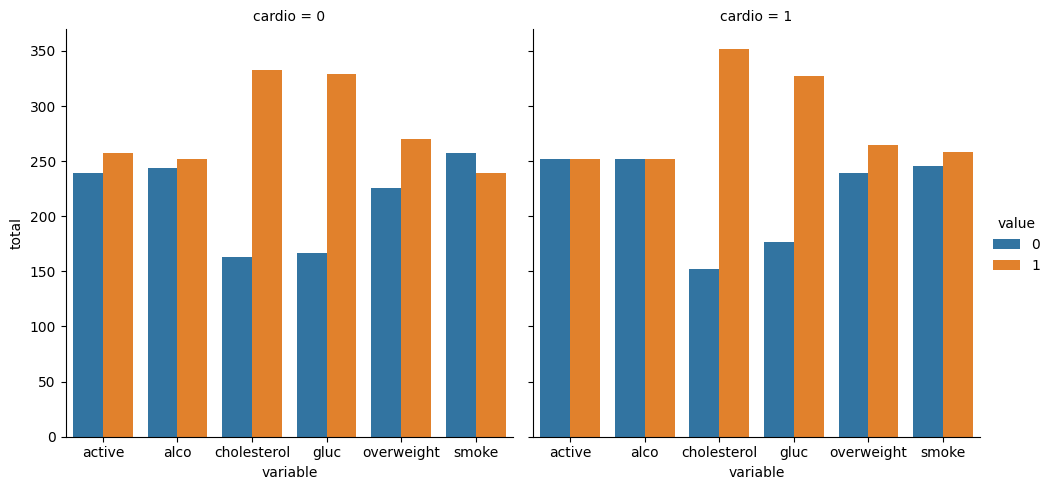

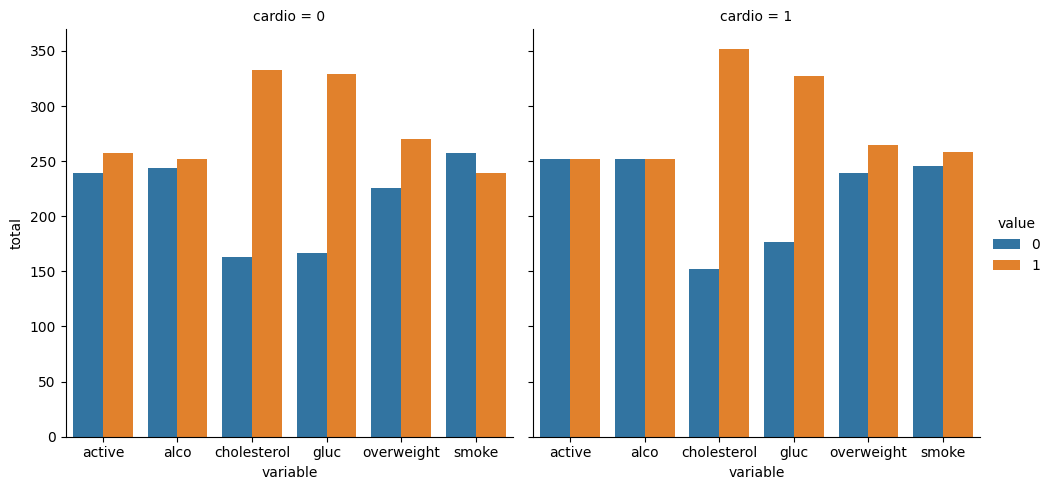

In [38]:
draw_cat_plot()

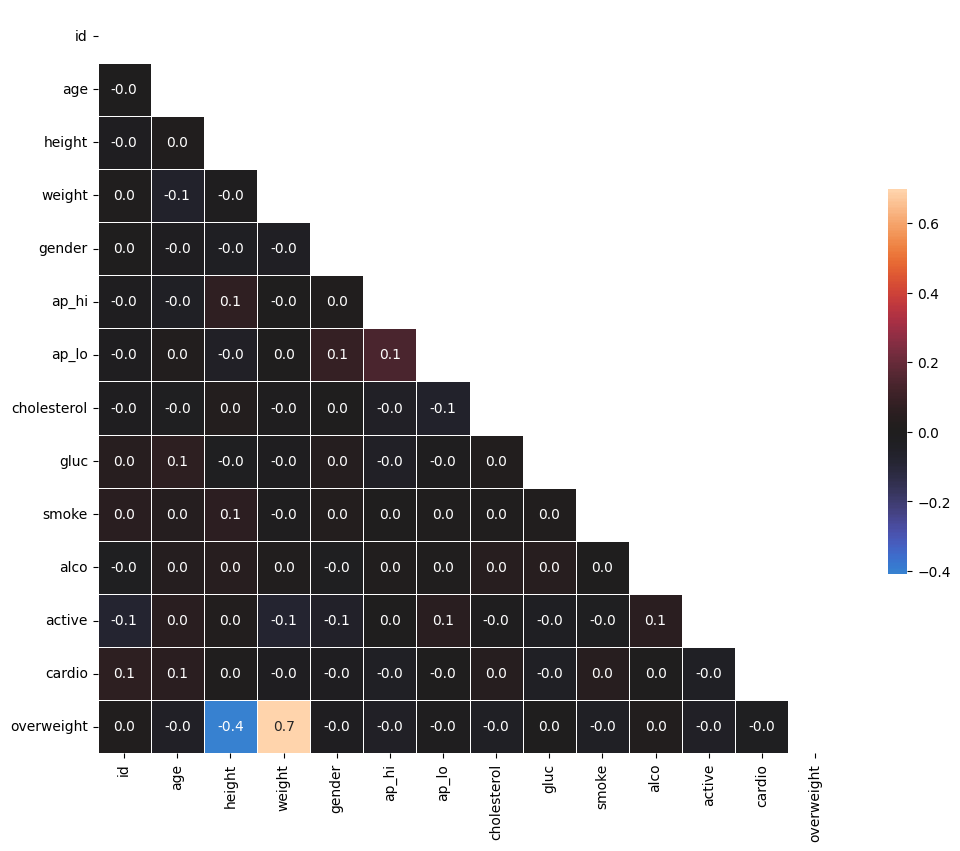

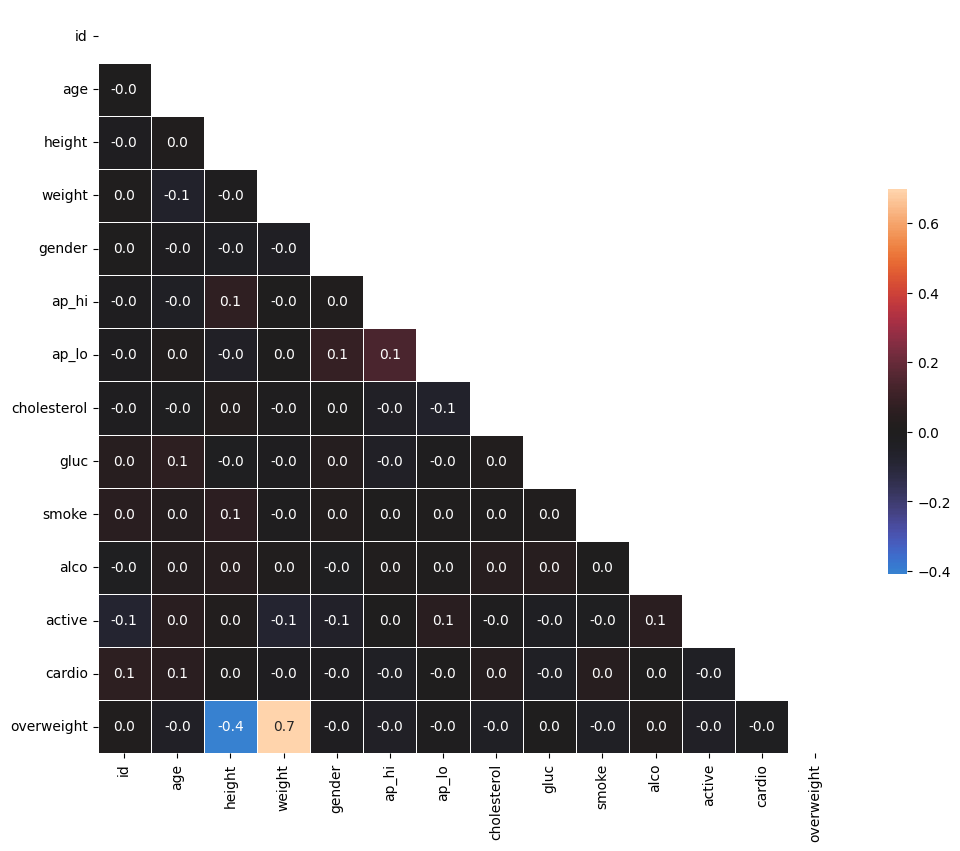

In [41]:
draw_heat_map()